In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
df =pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Extracting the relevant features that can define a customer churn

In [77]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)
df = df.drop('customerID', axis=1)


In [98]:



categorical_cols = df.select_dtypes(exclude='number').columns
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = df[numeric_cols].fillna(method='ffill')
categorical_cols = df[categorical_cols].fillna(method='ffill')

for col in categorical_cols.columns:
    categorical_cols[col], _ = pd.factorize(categorical_cols[col])

# Concatenate the encoded categorical columns with the rest of the DataFrame
final_df = pd.concat([df.drop(columns=categorical_cols), categorical_cols], axis=1)
final_df = final_df.dropna()

In [99]:

 # Target variable
X = final_df.drop('Churn', axis=1) # Features (exclude the target variable 'Churn')
column_names = final_df.drop('Churn', axis=1).columns
y = final_df['Churn']


In [96]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65


In [100]:
# Create and fit a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [101]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index = X.columns)

In [102]:
feature_importance

gender              0.028073
SeniorCitizen       0.021023
Partner             0.023004
Dependents          0.019291
tenure              0.152571
PhoneService        0.004330
MultipleLines       0.022363
InternetService     0.024460
OnlineSecurity      0.045120
OnlineBackup        0.023808
DeviceProtection    0.023422
TechSupport         0.043974
StreamingTV         0.017975
StreamingMovies     0.019961
Contract            0.078829
PaperlessBilling    0.025130
PaymentMethod       0.055766
MonthlyCharges      0.178952
TotalCharges        0.191946
dtype: float64

In [104]:
#DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance.sort_values(ascending=False)

In [36]:
feature_importance_df

TotalCharges        0.191855
MonthlyCharges      0.176351
tenure              0.156062
Contract            0.076954
PaymentMethod       0.055687
OnlineSecurity      0.044870
TechSupport         0.043255
gender              0.027937
InternetService     0.026409
OnlineBackup        0.025147
PaperlessBilling    0.024864
Partner             0.023022
MultipleLines       0.022570
DeviceProtection    0.021483
StreamingMovies     0.020238
SeniorCitizen       0.020025
Dependents          0.019857
StreamingTV         0.019081
PhoneService        0.004335
dtype: float64

In [106]:
important_columns = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
                'OnlineSecurity', 'TechSupport', 'gender', 'InternetService', 'OnlineBackup',
                'PaperlessBilling', 'MultipleLines', 'DeviceProtection']

final_df_selected = X[important_columns]
final_df_selected =pd.concat([final_df_selected,y], axis=1)

In [107]:
final_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalCharges      7032 non-null   float64
 1   MonthlyCharges    7032 non-null   float64
 2   tenure            7032 non-null   int64  
 3   Contract          7032 non-null   int64  
 4   PaymentMethod     7032 non-null   int64  
 5   OnlineSecurity    7032 non-null   int64  
 6   TechSupport       7032 non-null   int64  
 7   gender            7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  PaperlessBilling  7032 non-null   int64  
 11  MultipleLines     7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  Churn             7032 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 824.1 KB


## Exploratory Data Analysis

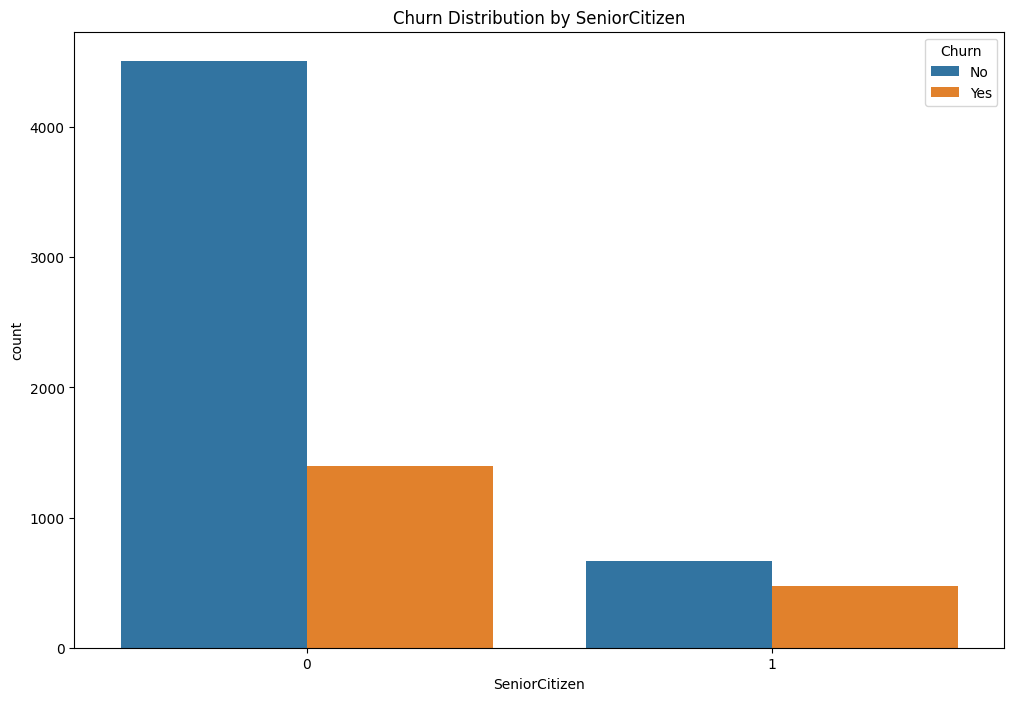

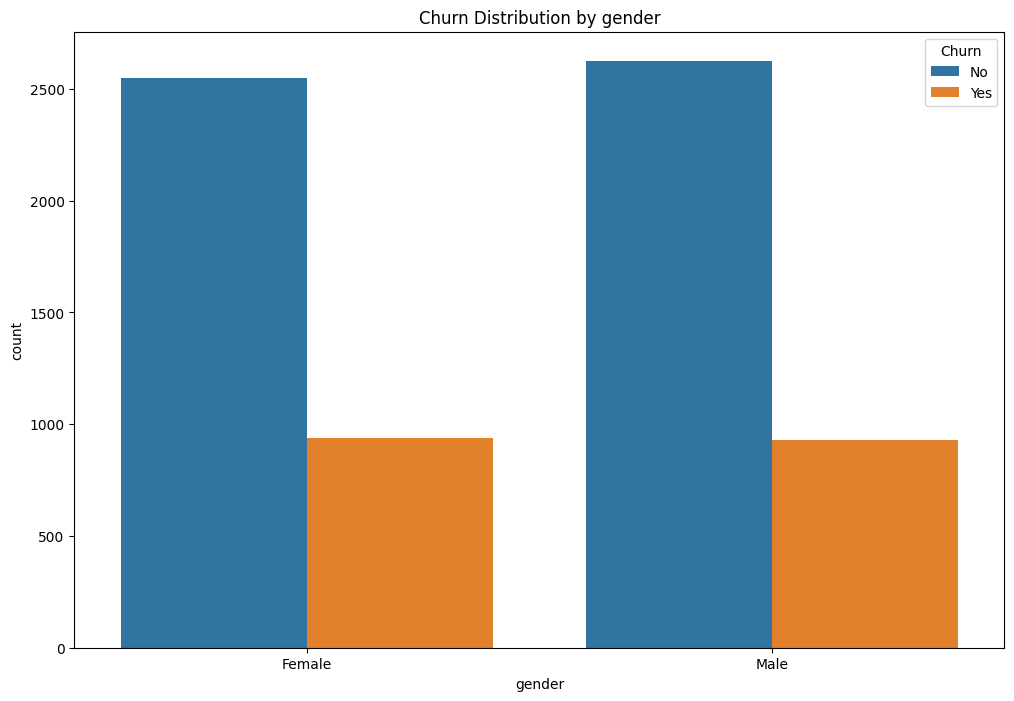

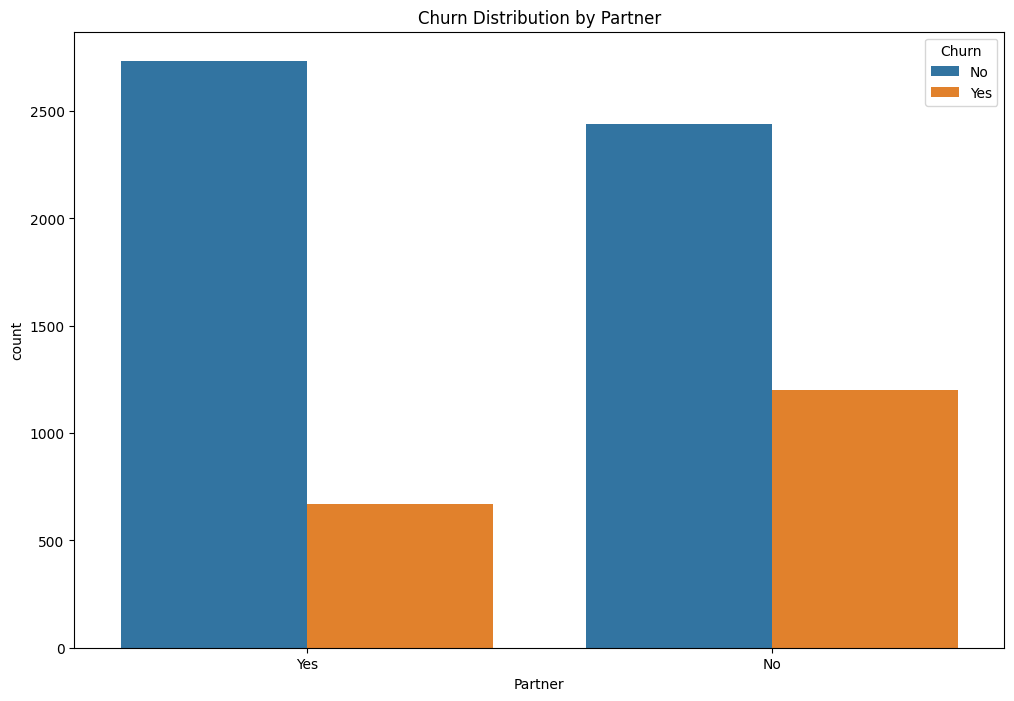

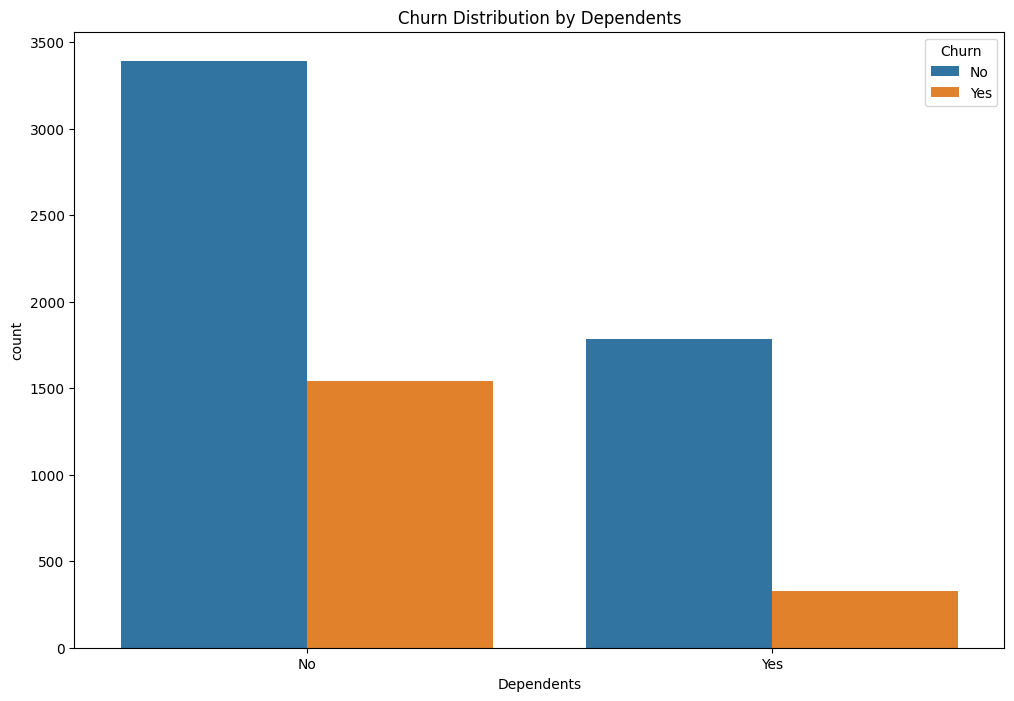

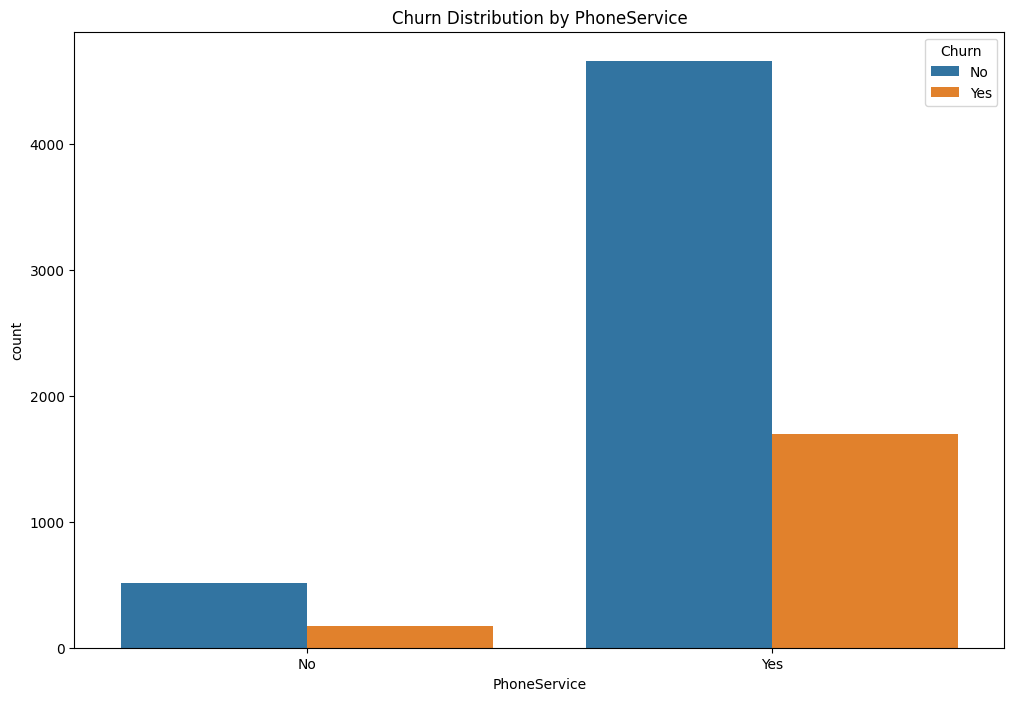

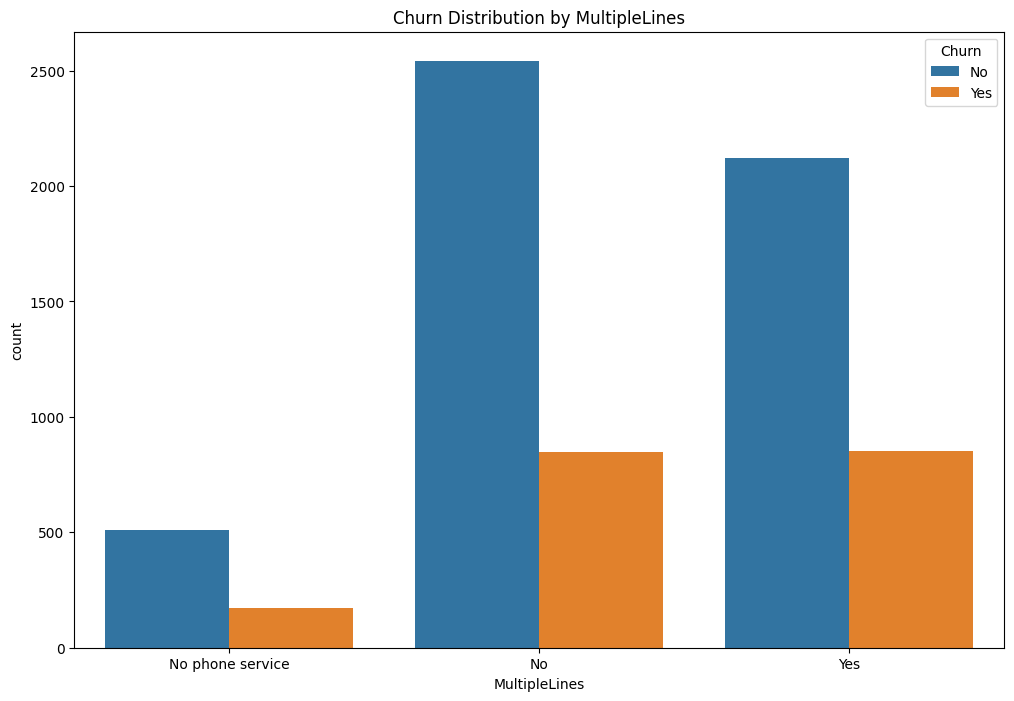

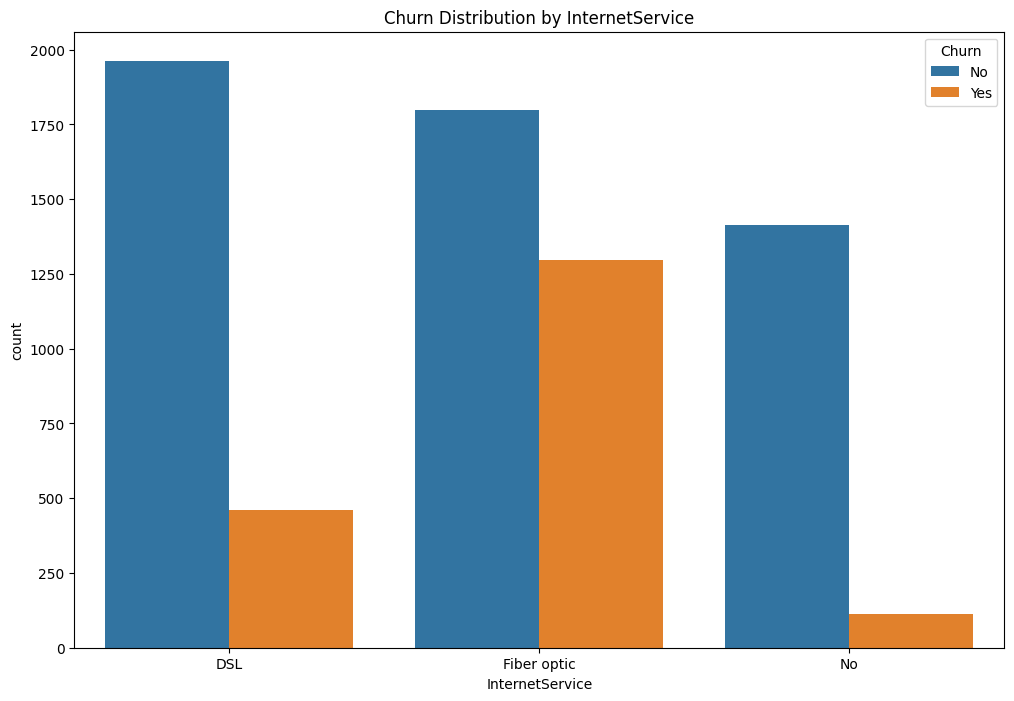

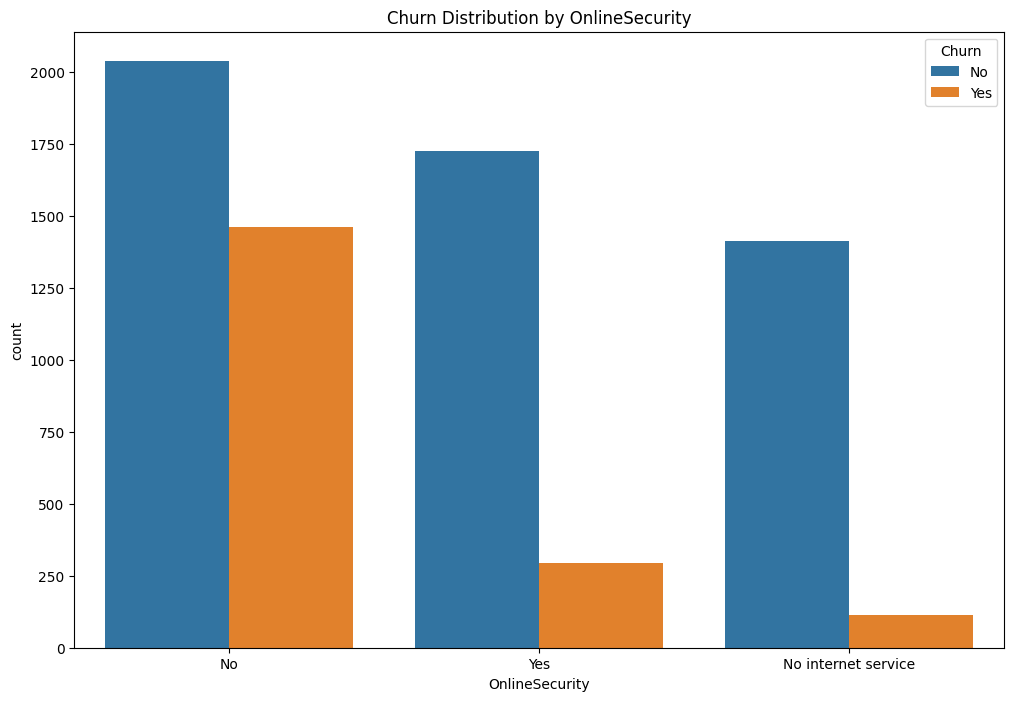

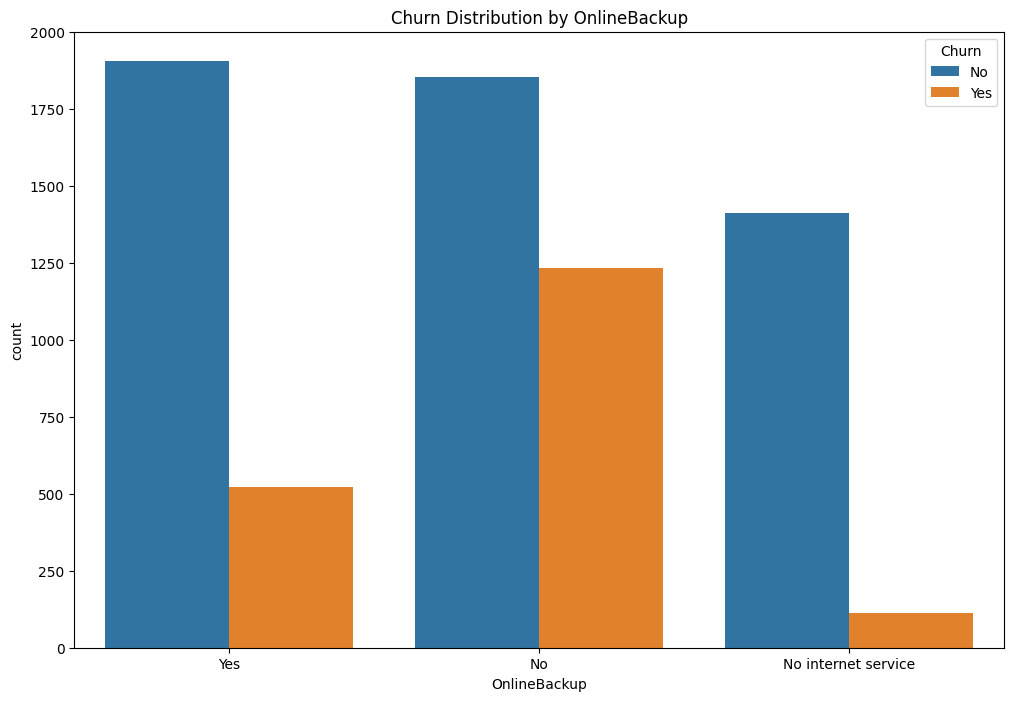

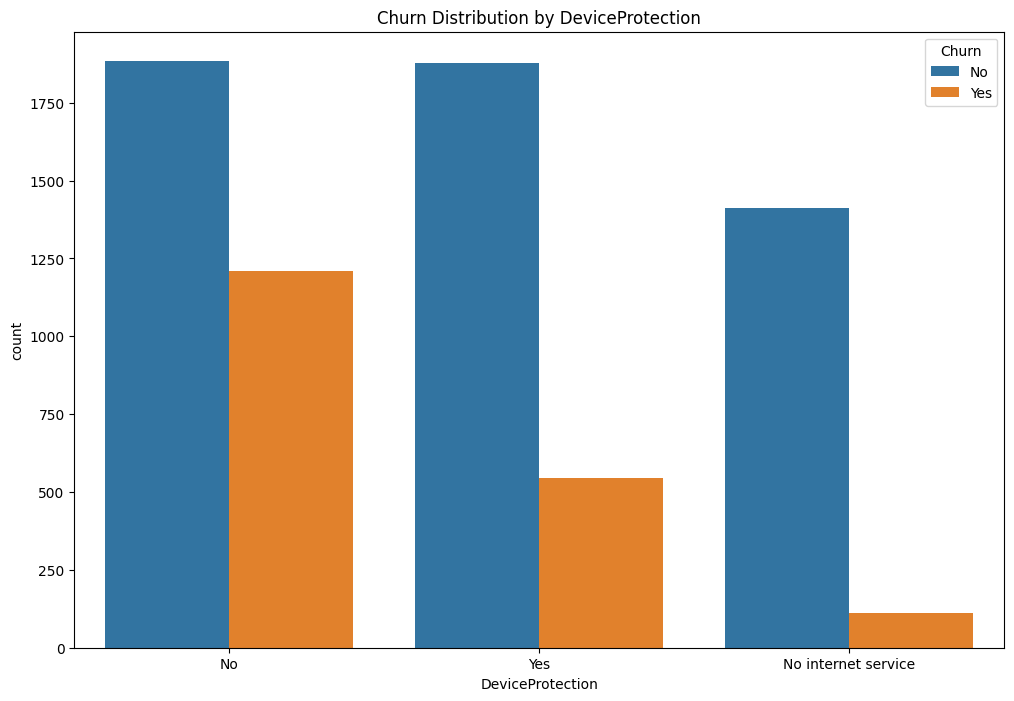

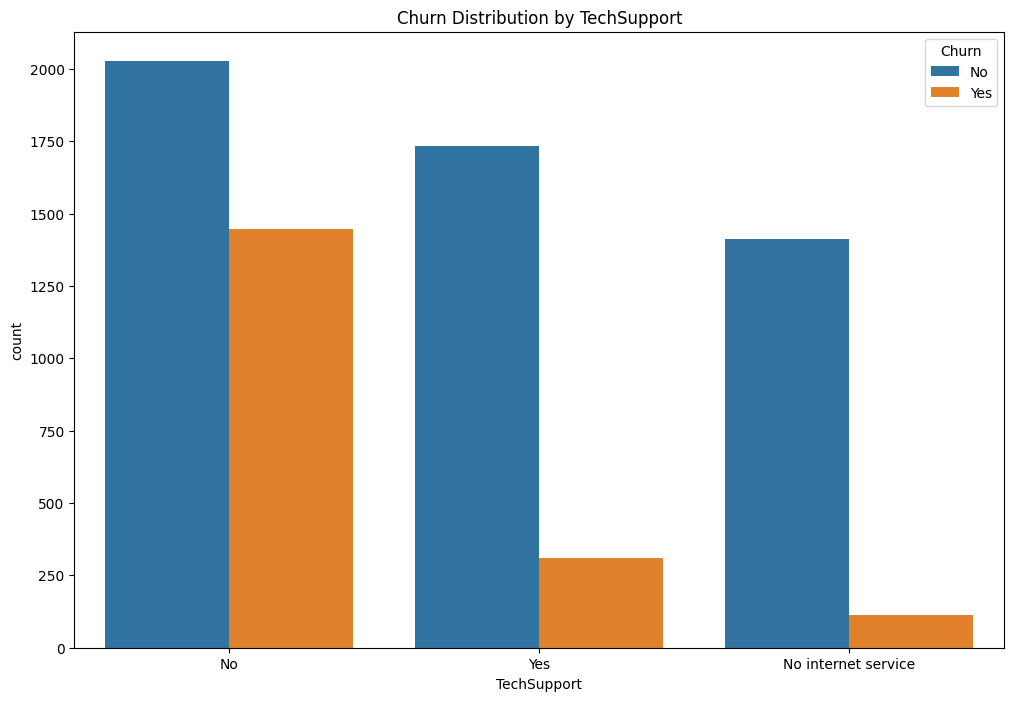

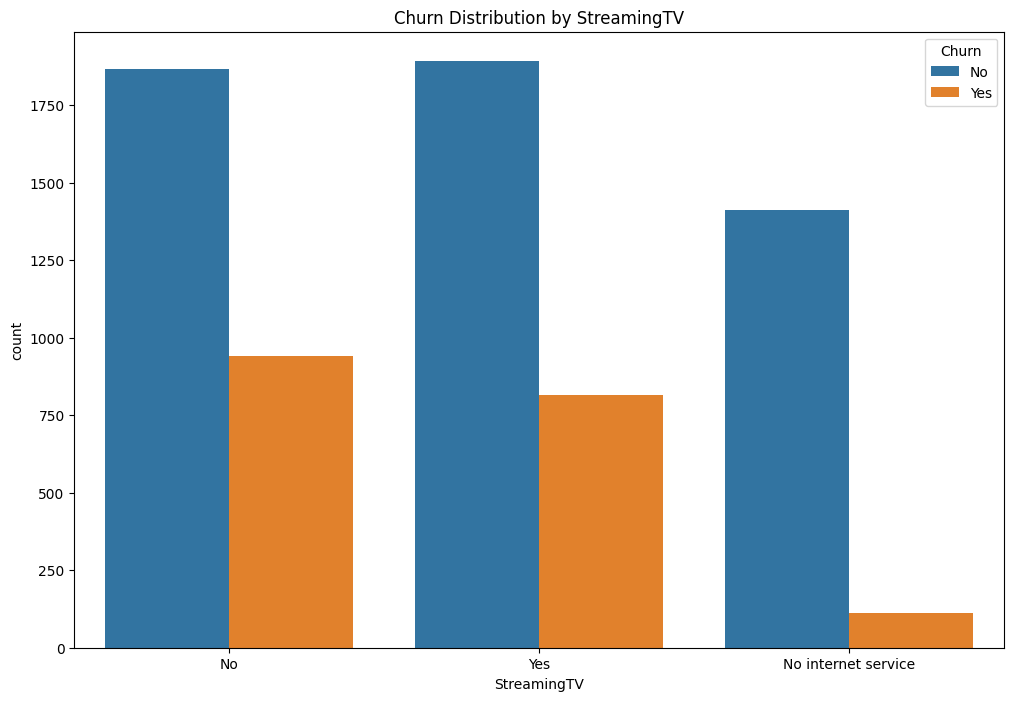

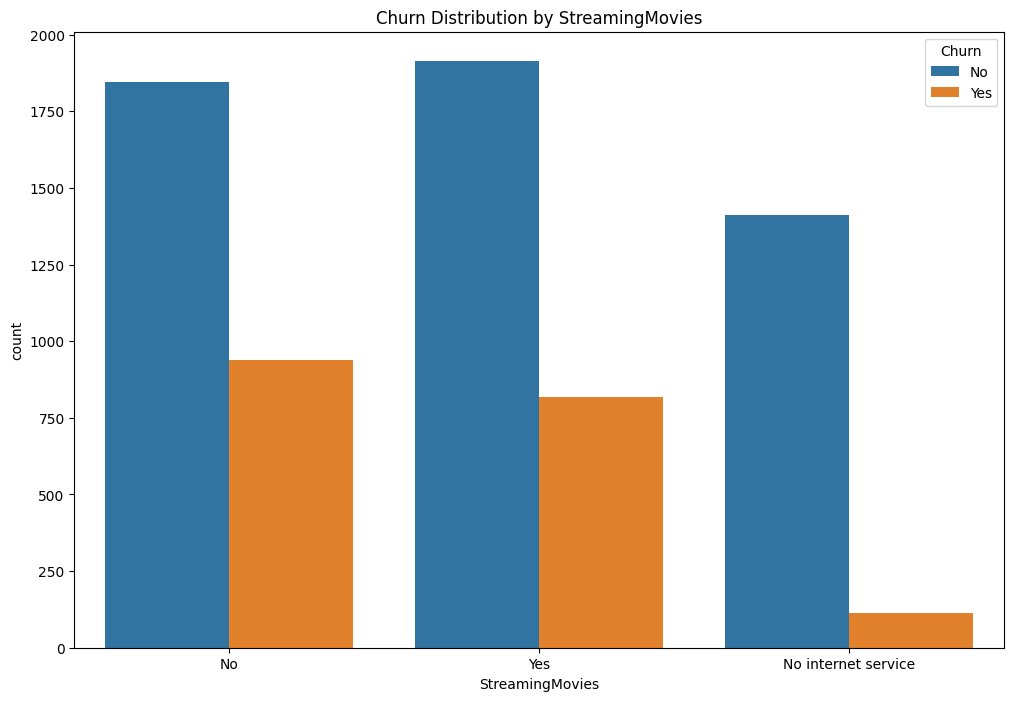

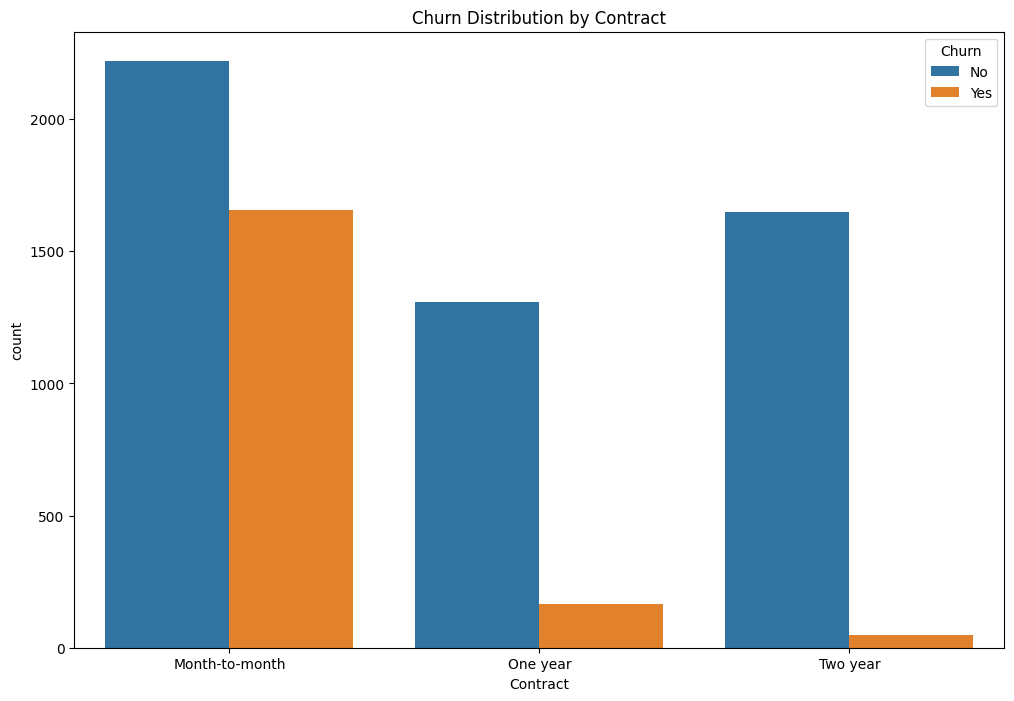

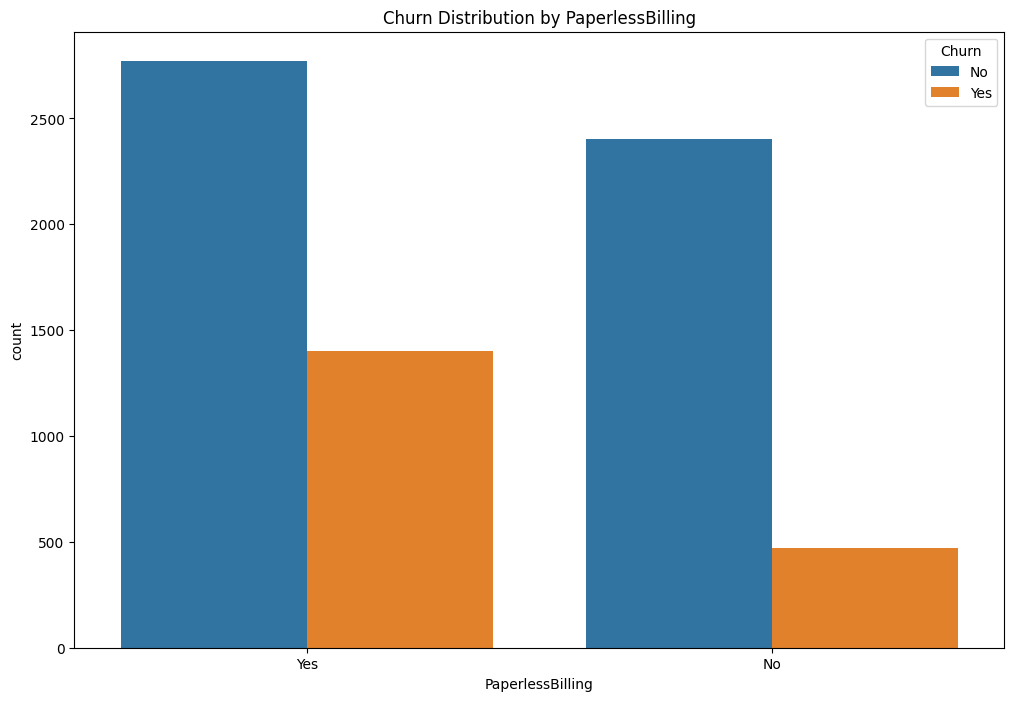

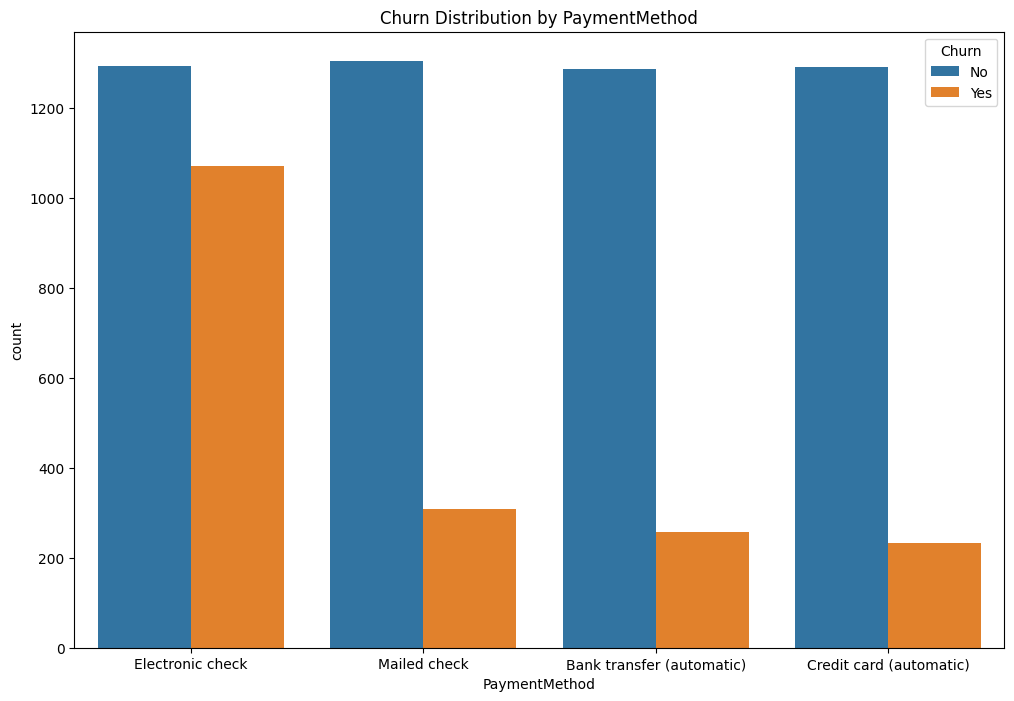

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categoric features
features_to_analyze = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


for feature in features_to_analyze:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Distribution by {feature}')
    plt.show()


From the above barplot we realise that customers with longer-term contracts are less likely to churn.

Payment methods such as Mailed check, bank transfer, credit card are associated with lower churn, whIle those with electronic check are more likely to churn so promoting these methods could be beneficial.

Customers using online security and tech support services are less likely to churn.

Customers with fiber optic internet service may be more prone to churn, so understanding their needs is crucial.
Customers with device protection, streaming services,  are less likely to churn.
Customers with no dependents have high churn probability compared to those that have


Gender, Partner, and MultipleLines have a lower impact to customers likelyhood of churning from the graphs.
Senior Citizens, Dependents, and Phone Service:

Senior Citizens and Dependents: These features have lower churn thus less importance in predicting churn.


EDA for numeric features

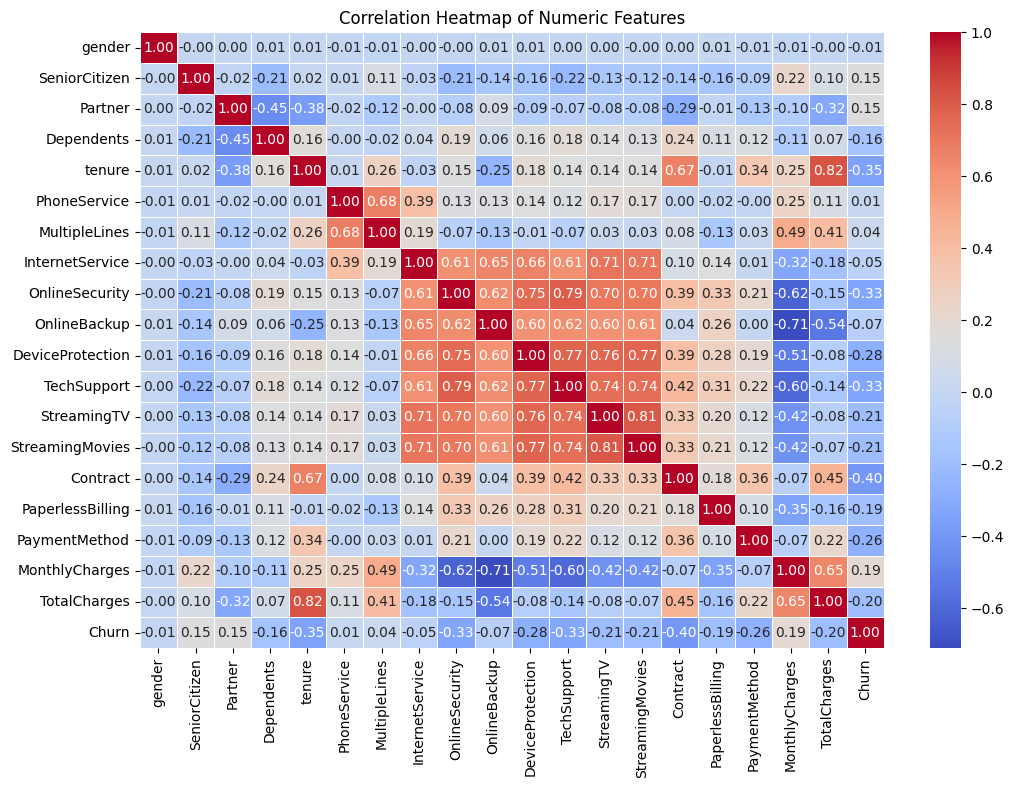

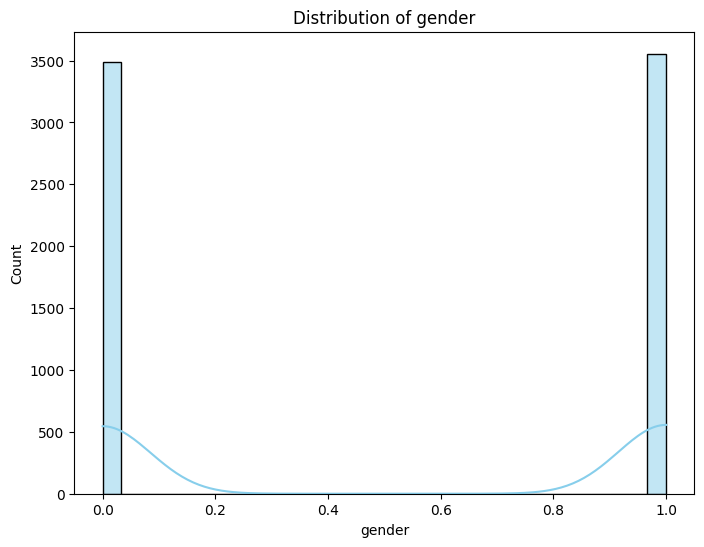

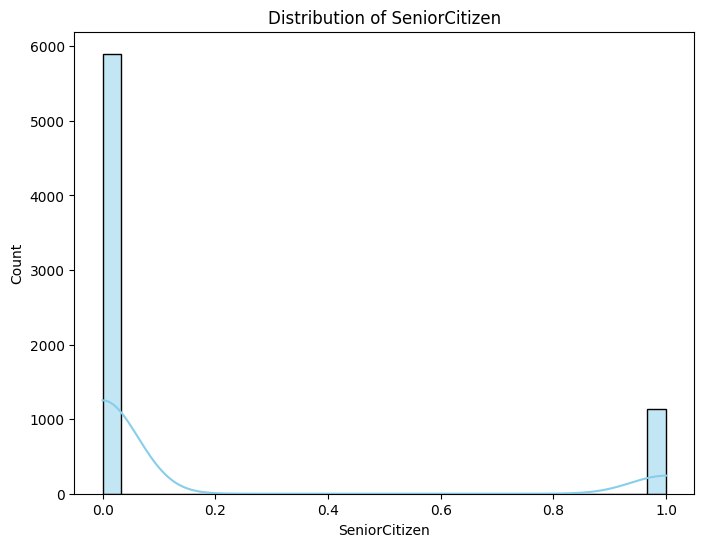

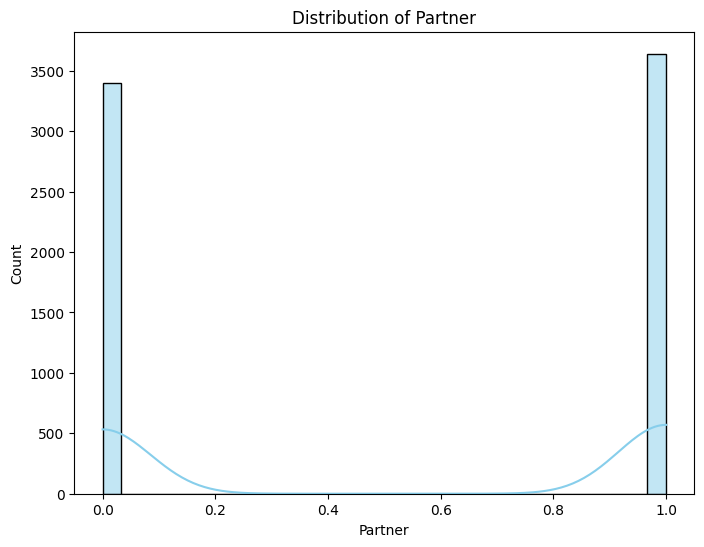

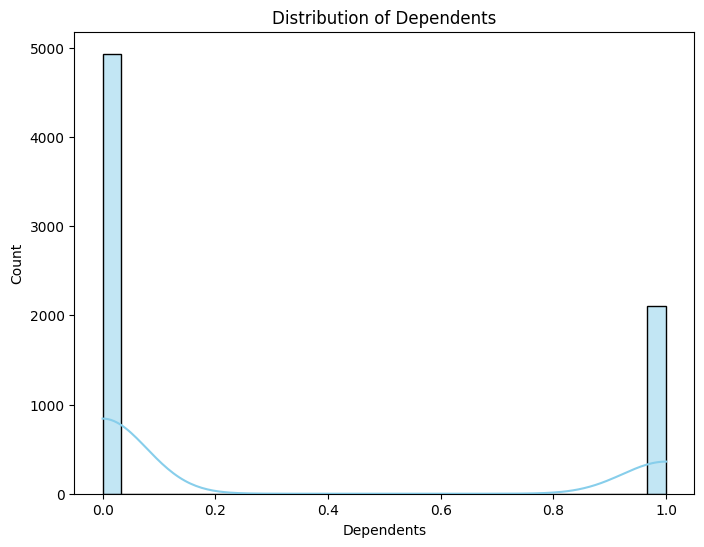

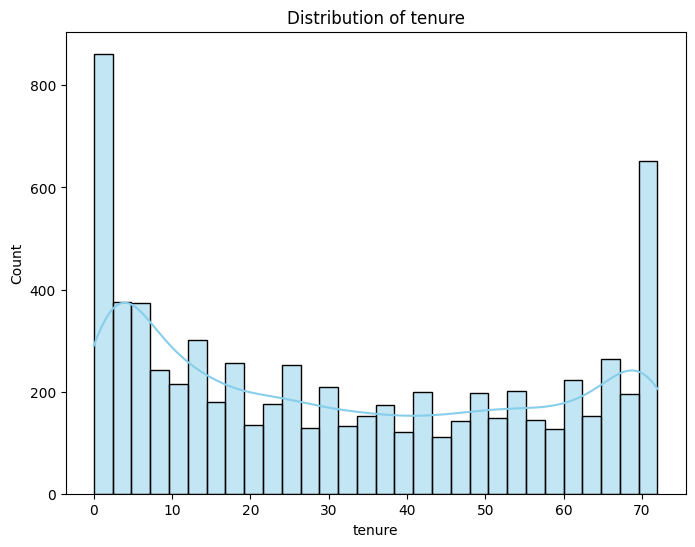

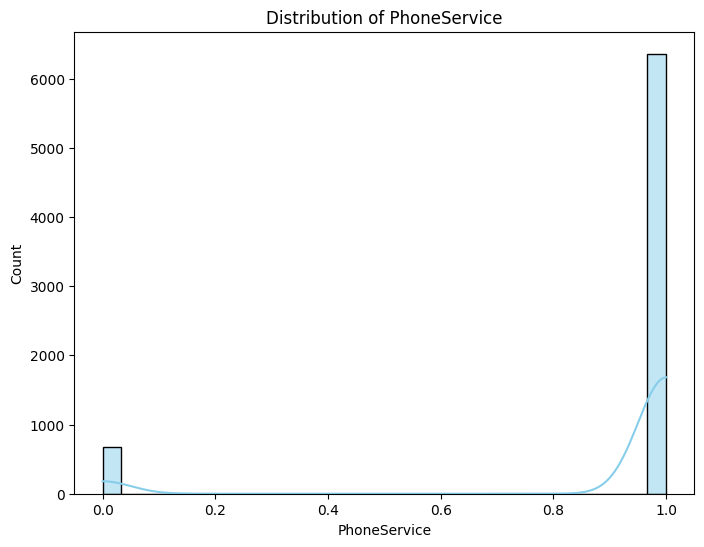

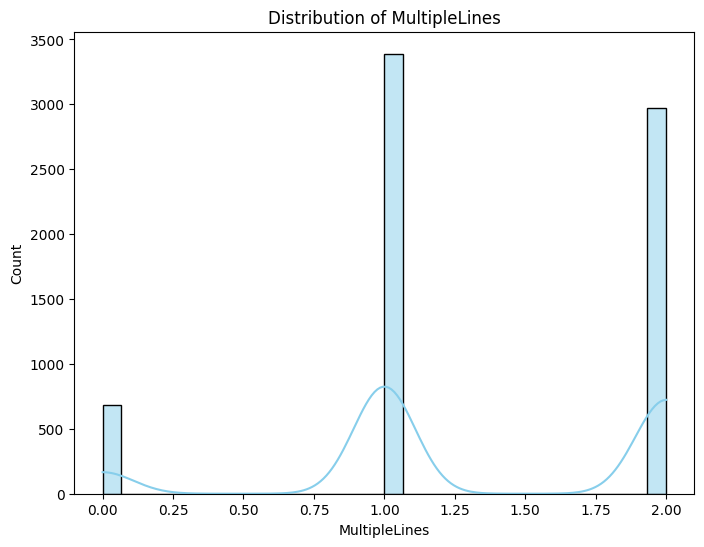

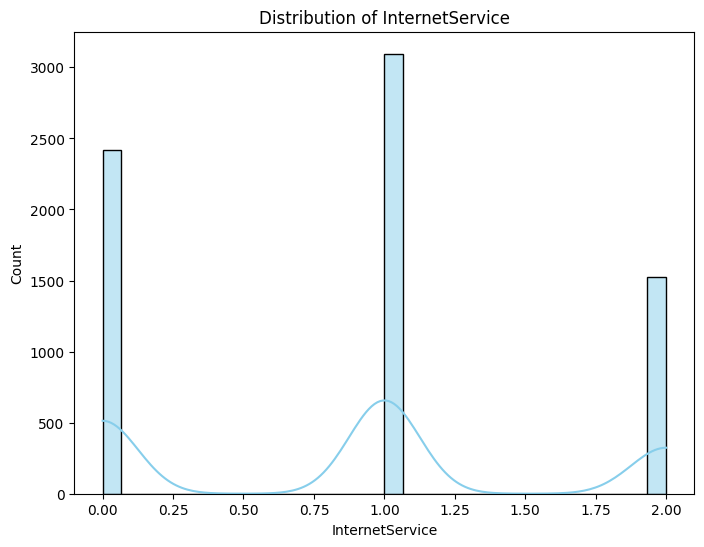

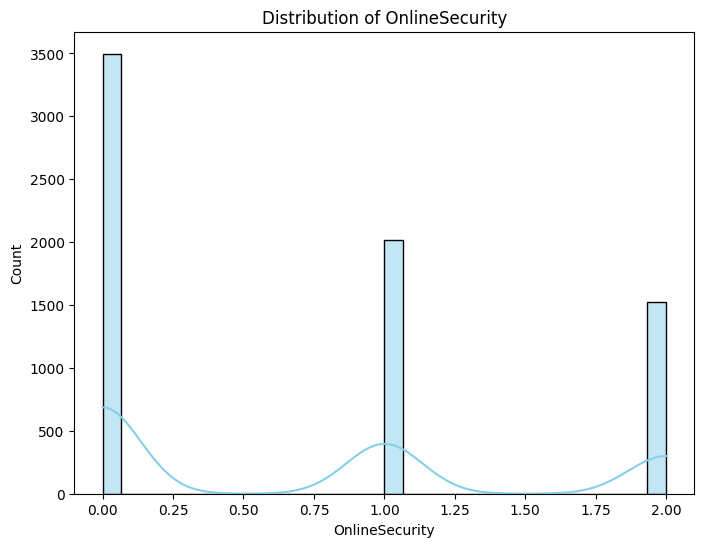

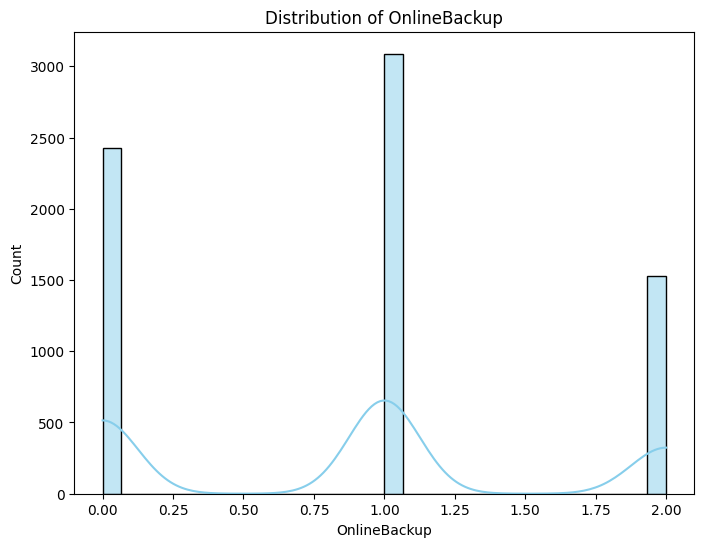

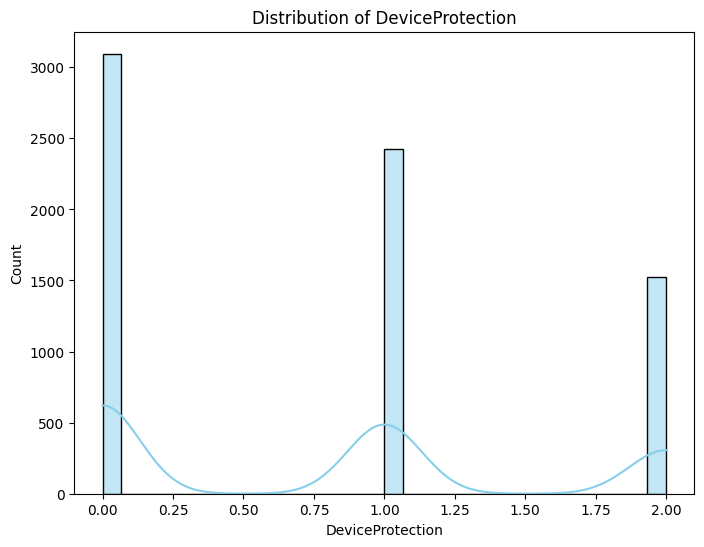

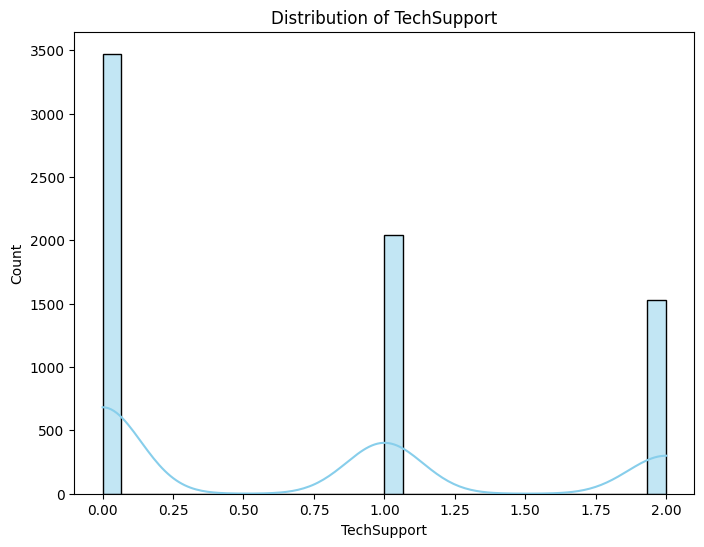

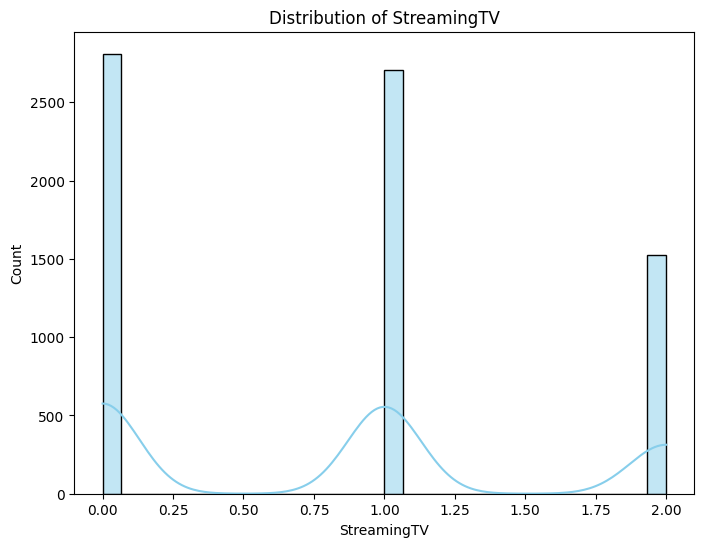

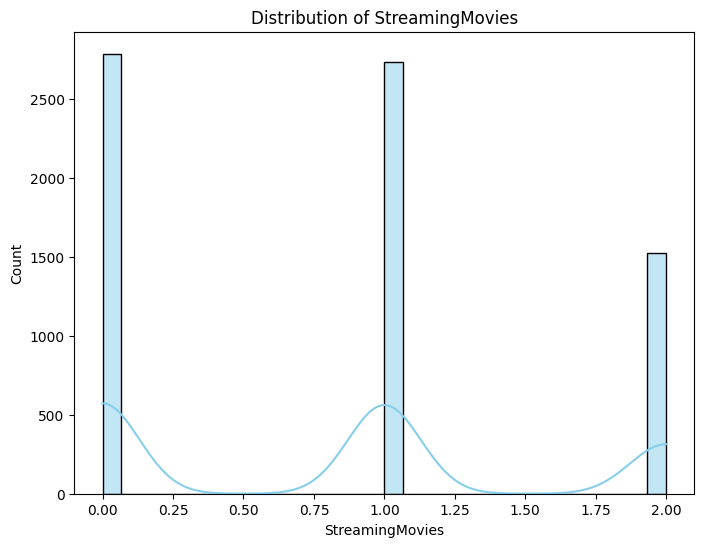

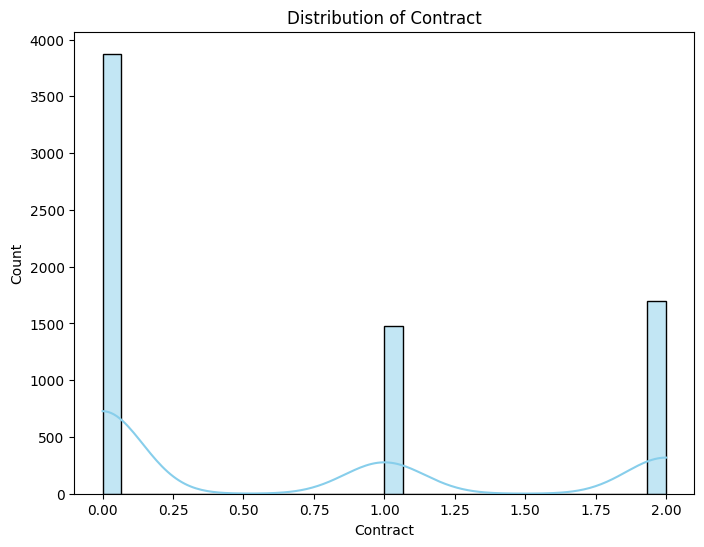

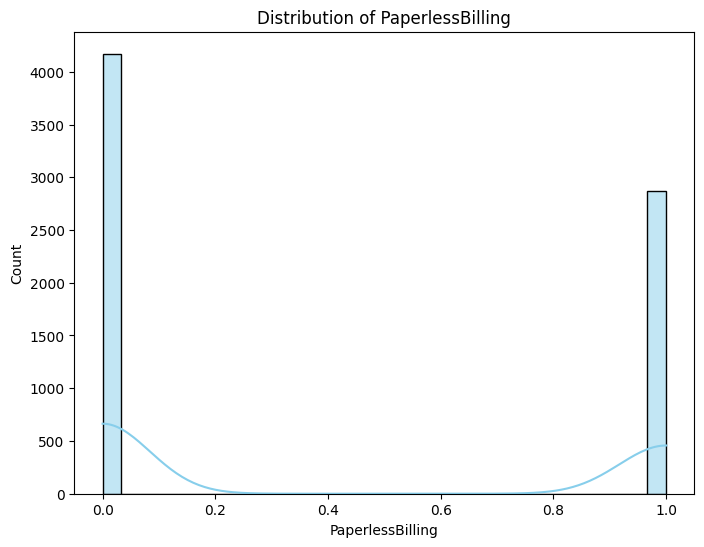

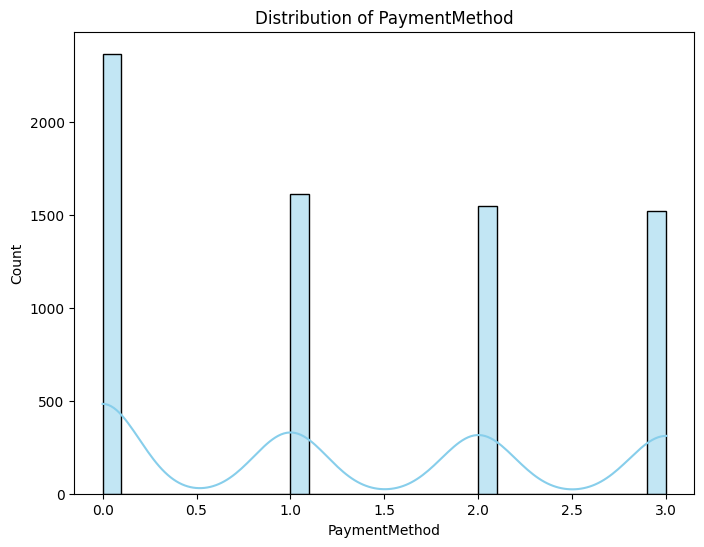

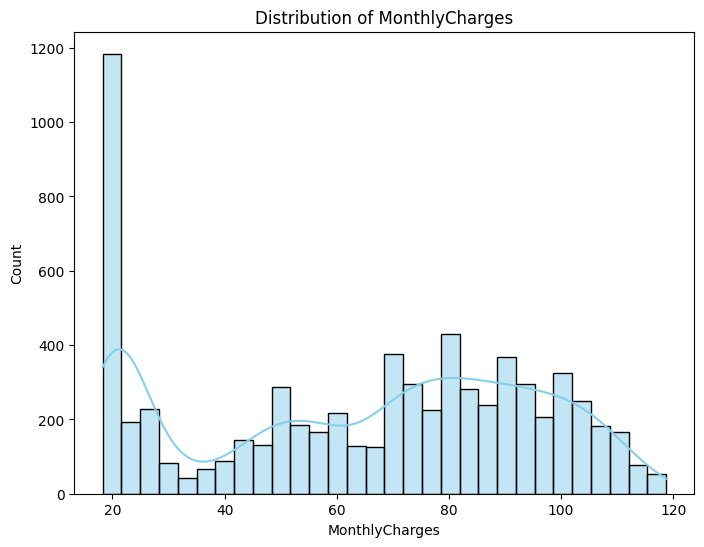

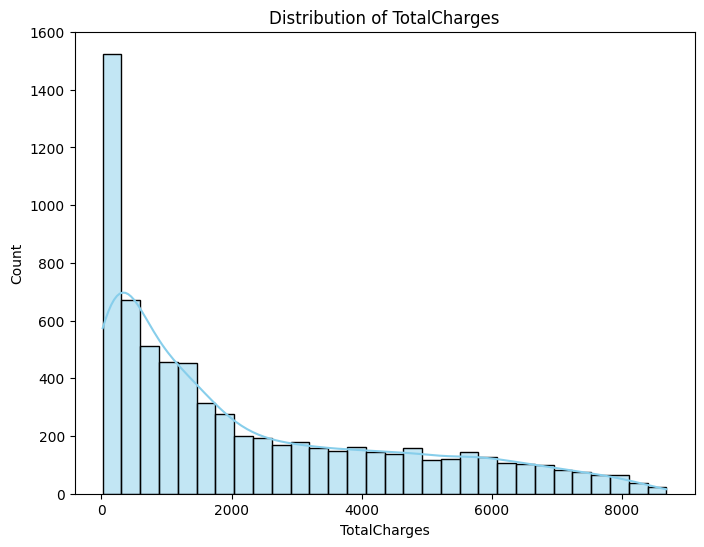

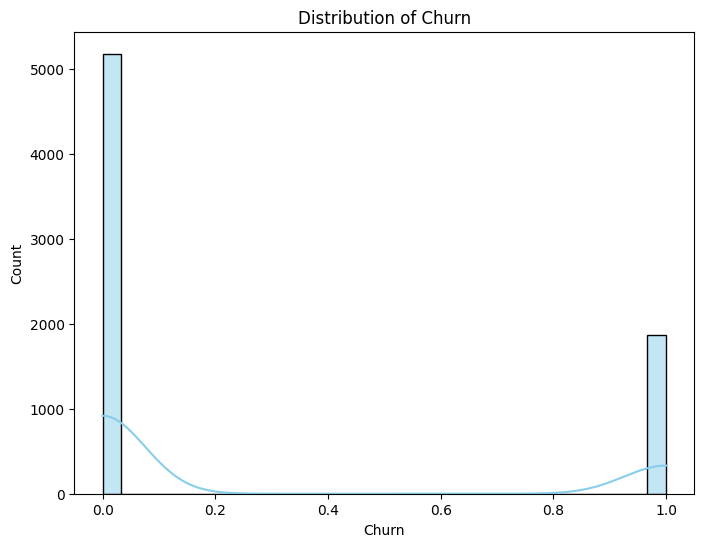

In [112]:

# Correlation heatmap to identify feature relationships
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Distribution of individual numeric features
for column in numeric_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Summary statistics for numerical features
print(final_df.describe())

# Frequency of categories in categorical features
for column in final_df.select_dtypes(include='object').columns:
    print(final_df[column].value_counts())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges       gender  \
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000   
mean        0.162147    32.371149       64.761692   2285.169963     0.504756   
std         0.368612    24.559481       30.090047   2267.544511     0.500013   
min         0.000000     0.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.500000    401.675000     0.000000   
50%         0.000000    29.000000       70.350000   1398.250000     1.000000   
75%         0.000000    55.000000       89.850000   3803.050000     1.000000   
max         1.000000    72.000000      118.750000   8684.800000     1.000000   

           Partner   Dependents  PhoneService  MultipleLines  InternetService  \
count  7043.000000  7043.000000   7043.000000    7043.000000      7043.000000   
mean      0.516967     0.299588      0.903166       1.325004         0.872923   
std       0.499748     0.458110     

Text(0.5, 1.0, 'Scatter Plot: MonthlyCharges vs. Churn')

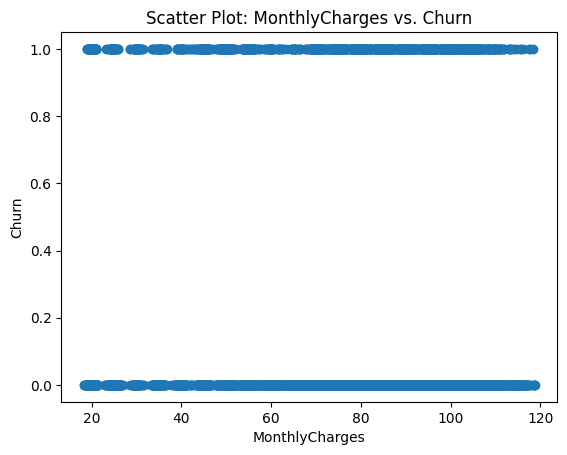

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(df['MonthlyCharges'], df['Churn'])
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.title('Scatter Plot: MonthlyCharges vs. Churn')

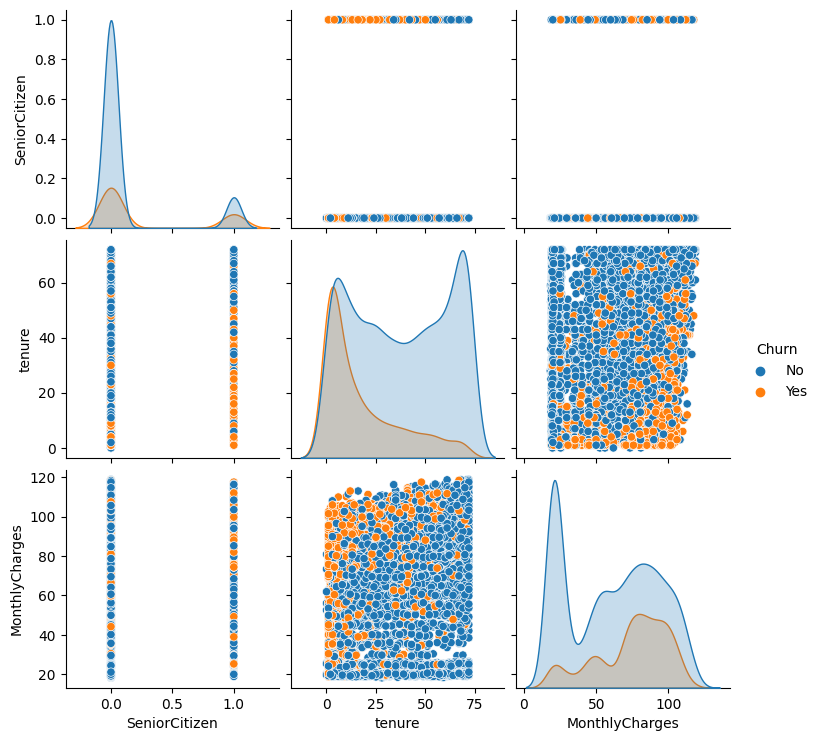

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar plot for the relationship between 'Contract' and 'Churn'

sns.pairplot(df, hue='Churn')



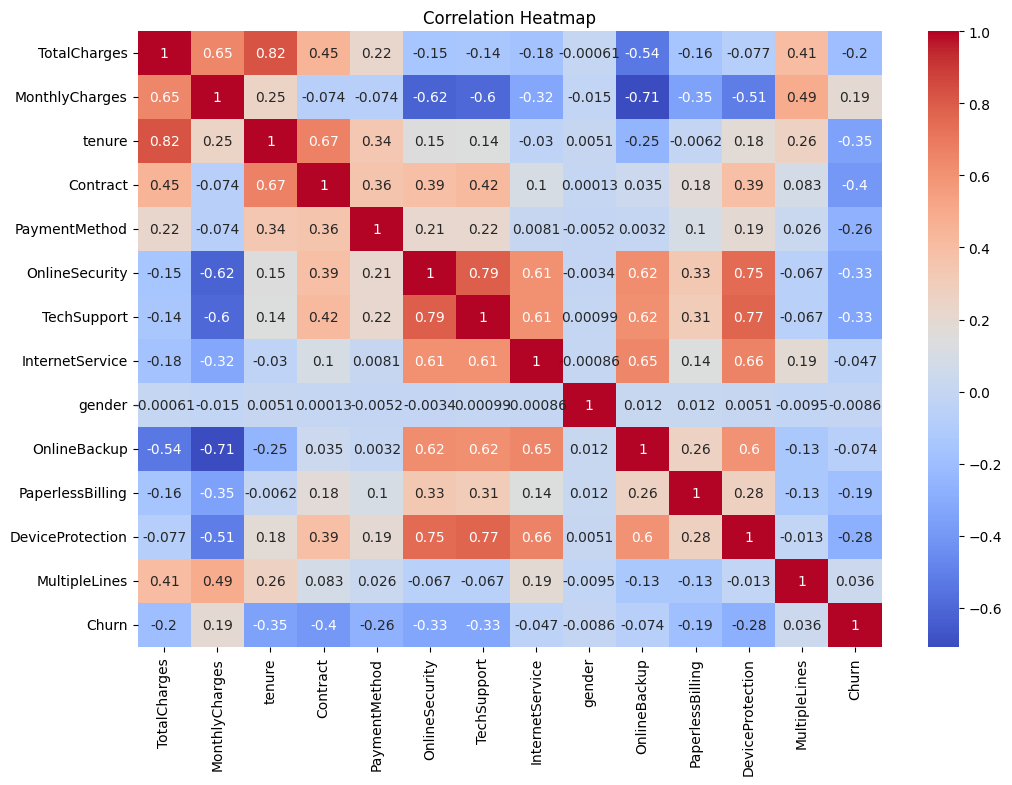

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between all numerical features and 'Churn'
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In general, the customer profile generated from our Exploratory data Analysis is that Long-tenured customers with higher total charges, committed to longer contracts, and using stable payment methods are less likely to churn.

Customers with higher monthly charges, shorter tenures, and potentially using certain internet services or lacking additional protections might be more prone to churn.
Also offering additional services like online security, tech support, and various streaming options can positively influence customer retention.
Features like gender, partnership status, and having multiple lines have some impact but are less significant in predicting churn.

## defining and training of the model

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [110]:
Y = final_df_selected['Churn']  # Target variable
x = final_df_selected.drop('Churn', axis=1).values
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [ ]:
import pickle

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score
from scikeras.wrappers import KerasClassifier


In [ ]:
# Function to create the MLP model
def create_model(optimizer='adam', hidden_layer1_units=64, hidden_layer2_units=32):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(hidden_layer1_units, activation='relu')(input_layer)
    hidden_layer2 = Dense(hidden_layer2_units, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier for use with GridSearchCV
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0, hidden_layer1_units=32, hidden_layer2_units=16)

In [ ]:
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'hidden_layer1_units': [32, 64, 128],
    'hidden_layer2_units': [16, 32, 64]
}

# Define custom scorer for GridSearchCV based on AUC score
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=auc_scorer, cv=StratifiedKFold(n_splits=5), verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best AUC Score: {grid_result.best_score_}')

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy_best = accuracy_score(y_test, y_pred_binary)
auc_score_best = roc_auc_score(y_test, y_pred)
print(f'Test Accuracy (Best Model): {accuracy_best}')
print(f'AUC Score (Best Model): {auc_score_best}')

Best Parameters: {'hidden_layer1_units': 64, 'hidden_layer2_units': 32, 'optimizer': 'rmsprop'}
Best AUC Score: 0.7209952131180246
Test Accuracy (Best Model): 0.8161816891412349
AUC Score (Best Model): 0.7557578643369528


Model optimisation

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


# Define the model using the optimized hyperparameters
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer1 = Dense(128, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
optimized_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with the SGD optimizer
optimized_model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the entire training set
optimized_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the optimized model on the test set
y_pred_optimized = optimized_model.predict(X_test)
y_pred_optimized_binary = (y_pred_optimized > 0.5).astype(int)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized_binary)
auc_score_optimized = roc_auc_score(y_test, y_pred_optimized)

print(f'Test Accuracy (Optimized Model): {accuracy_optimized}')
print(f'AUC Score (Optimized Model): {auc_score_optimized}')

Epoch 1/10
177/177 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7219
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7515
Epoch 3/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7788
Epoch 4/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7888
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7930
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7961
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7962
Epoch 8/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7978
Epoch 9/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7975
Epoch 10/10
45/45 [==============================] - 0s 1ms/step
Test Accuracy (Optimized Model): 0.

In [ ]:
import pickle
# Define the file path where you want to save the model
model = optimized_model



with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)


